<a href="https://colab.research.google.com/github/tamer017/for-her-/blob/master/MINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project I used MNIST data to build a neural network to recognize ten handwritten digits, 0-9 .

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
tf.random.set_seed(1234) # to get the same output at every time i run the code

# Loading the data

In [60]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

check the size of the train and test datasets

In [61]:
print ('The shape of the train input is: ' + str(x_train.shape))
print ('The shape of the train output is: ' + str(y_train.shape))
print ('The shape of the test input is: ' + str(x_test.shape))
print ('The shape of the test output is: ' + str(y_test.shape))
print ('The input image shape is: ' + str(x_train.shape[1:])+' pexels')
print ('The unique outputs are: ' + str(np.unique(y_train))+ ' the ten digits')

The shape of the train input is: (60000, 28, 28)
The shape of the train output is: (60000,)
The shape of the test input is: (10000, 28, 28)
The shape of the test output is: (10000,)
The input image shape is: (28, 28) pexels
The unique outputs are: [0 1 2 3 4 5 6 7 8 9] the ten digits


In [62]:
# reshape the dimensions of the input to be ready to use it in the model 
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
print ('The shape of the train input is: ' + str(x_train.shape))
print ('The shape of the test input is: ' + str(x_test.shape))

The shape of the train input is: (60000, 784)
The shape of the test input is: (10000, 784)


#### Visualizing the Data

visualizing a subset of the training set. 
- In the cell below, the code randomly selects 64 rows from `x_train`, maps each row back to a 28 pixel by 28 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image 

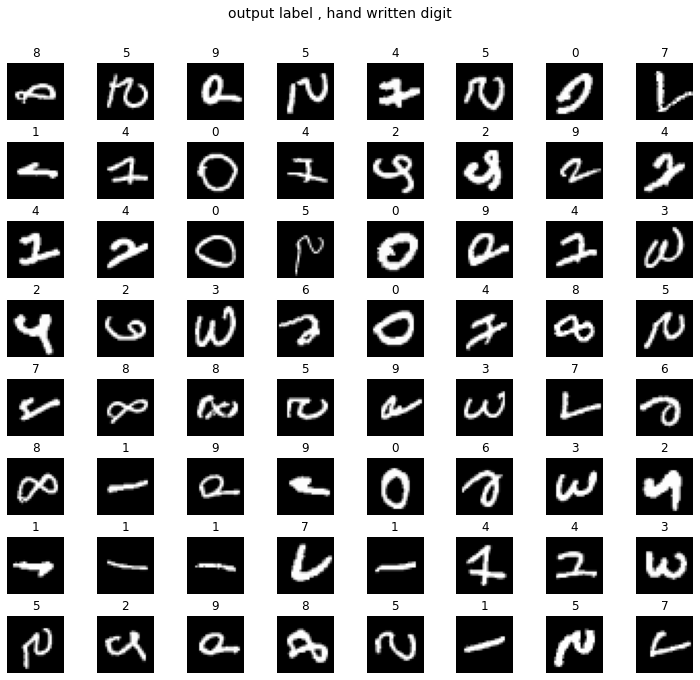

In [ ]:
m, n = x_train.shape
fig, axes = plt.subplots(8,8, figsize=(10,10))
# to add padding to the cells
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_train[random_index].reshape((28,28)).T
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    # Display the label above the image
    ax.set_title(y_train[random_index])
    ax.set_axis_off()
    fig.suptitle("output label , hand written digit", fontsize=14)

### Model representation

The neural network you will use in this assignment is shown in the figure below. 
- This has two dense layers with ReLU activations followed by an output layer with a linear activation. 
    - The inputs are pixel values of digit images that are of size 28 x 28, this gives us 784 inputs.
    - The output is one digit from 0 to 9.
    

In [ ]:
model = Sequential([               
        Dense(25,activation="relu"),
        Dense(15,activation="relu"),
        Dense(10,activation="linear"),], name = "MNIST_model" )
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,),optimizer=tf.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))
    

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9259 - accuracy: 0.4837 - val_loss: 1.0543 - val_accuracy: 0.6584
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7260 - accuracy: 0.7890 - val_loss: 0.5194 - val_accuracy: 0.8486
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4035 - accuracy: 0.8872 - val_loss: 0.3453 - val_accuracy: 0.9056
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3241 - accuracy: 0.9083 - val_loss: 0.3140 - val_accuracy: 0.9119
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2806 - accuracy: 0.9213 - val_loss: 0.2797 - val_accuracy: 0.9243
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2616 - accuracy: 0.9263 - val_loss: 0.2771 - val_accuracy: 0.9215
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2461 - accuracy: 0.9297 - val_loss: 0.3048 - val_ac

#### Visualizing the Data

visualizing a subset of the test set. 
- In the cell below, the code randomly selects 64 rows from `x_test`, maps each row back to a 28 pixel by 28 pixel grayscale image and displays the images together. 
- The accual output label is compered with the predicted output label.

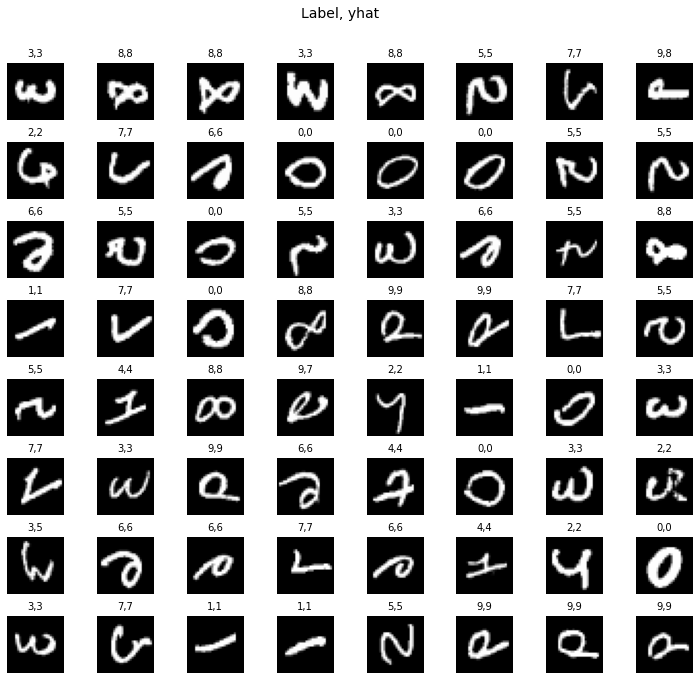

In [ ]:
m, n = x_test.shape
fig, axes = plt.subplots(8,8, figsize=(10,10))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) 
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_test[random_index].reshape((28,28)).T
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    # Predict using the Neural Network
    prediction = model.predict(x_test[random_index].reshape(1,784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    # Display the label above the image
    ax.set_title(f"{y_test[random_index]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("accual output label , predicted output label", fontsize=14)
plt.show()

The number of wrong predicted output

In [70]:
prediction = model.predict(x_test.reshape(10000,784))
prediction_p = tf.nn.softmax(prediction)
yhat = np.argmax(prediction_p,axis=1)
np.sum(yhat-y_test!=0)

520